In [1]:
import os

In [2]:
!pwd

/home/jovyan/notebooks/executions


In [3]:
import sys
sys.path.append('/home/jovyan/')

In [4]:
from experiments.reporting.report_repository import ReportRepository
from experiments.slack_client import SlackNotifier
from neat.neat_logger import get_neat_logger
from neat.population_engine import EvolutionEngine
from neat.reporting.reports_pyneat import EvolutionReport
from neat.utils import timeit
import math
import random
from itertools import count
import numpy as np

from experiments.logger import logger
from experiments.slack_client import Notifier
from neat.configuration import get_configuration
from neat.evaluation.evaluation_engine import EvaluationStochasticEngine
from neat.evolution_operators.crossover import Crossover
from neat.evolution_operators.mutation import Mutation
from neat.genome import Genome
from neat.reporting.reports_pyneat import EvolutionReport
from neat.species import SpeciationEngine
from neat.stagnation import Stagnation
from neat.population_engine import PopulationEngine
from neat.utils import timeit
import neat
import tests
from config_files.configuration_utils import create_configuration

In [5]:
# dir(neat)

In [6]:
LOGS_PATH = f'{os.getcwd()}/'
logger = get_neat_logger(path=LOGS_PATH)

### Configuration

In [7]:
# DATASET = 'mnist_binary'
# DATASET = 'mnist_binary'
DATASET = 'mnist_downsampled'
config = create_configuration(filename=f'/{DATASET}.json')

In [32]:
# TODO: better mechanism for override
config.pop_size = 20
# config.n_samples = 50
#
config.n_generations = 300
config.node_add_prob = 0.5
config.n_output = 2
config.n_processes = 5
config.n_initial_hidden_neurons = 1


ALGORITHM_VERSION = 'bayes-neat'

# CORRELATION_ID = 'parameters_grid'
CORRELATION_ID = 'solve_binary'

In [33]:
report_repository = ReportRepository.create(project='neuro-evolution', logs_path=LOGS_PATH)
notifier = SlackNotifier.create(channel='batch-jobs')

In [34]:
report = EvolutionReport(report_repository=report_repository,
                         algorithm_version=ALGORITHM_VERSION,
                         dataset=DATASET,
                         correlation_id=CORRELATION_ID)

In [35]:
population_engine = PopulationEngine(stagnation_engine=Stagnation())
speciation_engine = SpeciationEngine()
evaluation_engine = EvaluationStochasticEngine()

In [36]:
# evaluation_engine.n_processes

### Initialize

In [37]:
end_condition = 'normal'
# try:
# initialize population
population = population_engine.initialize_population()
speciation_engine.speciate(population, generation=0)

population = evaluation_engine.evaluate(population=population)

# report
report.report_new_generation(generation=0,
                                  population=population,
                                  species=speciation_engine.species)

2020-03-24 18:59:39,393 - INFO - Generation 0. Best fitness: -0.539. N-Parameters Best: 20
2020-03-24 18:59:39,394 - INFO -                          Mean fitness: -0.924. Mean N-Parameters: 19.7
2020-03-24 18:59:39,394 - INFO -     New best individual (18) found with fitness -0.539


/opt/conda/lib/python3.7/site-packages/jsons/_common_impl.py:40: UserWarning: Recursive structure detected in attribute "T" of object of type "numpy.int64", ignoring the attribute. You can suppress warnings like this using jsons.suppress_warnings().
  warnings.warn(msg_, *args, **kwargs)
/opt/conda/lib/python3.7/site-packages/jsons/_common_impl.py:40: UserWarning: Failed to dump attribute "data" of object of type "numpy.int64". Reason: invalid indexing of 0-dim memory. Ignoring the attribute. You can suppress warnings like this using jsons.suppress_warnings().
  warnings.warn(msg_, *args, **kwargs)


Confusion Matrix:
[[ 49856  48144]
 [  1291 112209]]
Accuracy: 76.62647754137116 %


In [38]:
def run_generation(generation, population):
    
    # create new generation's population
    population = population_engine.reproduce(species=speciation_engine.species,
                                             pop_size=population_engine.pop_size,
                                             generation=generation)
    # create new species based on new population
    speciation_engine.speciate(population, generation=generation)

    # evaluate
    population = evaluation_engine.evaluate(population=population)

    # generation report
    report.report_new_generation(generation=generation,
                                 population=population,
                                 species=speciation_engine.species)
    generation += 1
    return population

In [39]:
generation = 1

In [50]:
generation += 1
population = run_generation(generation, population)

2020-03-24 19:04:20,549 - INFO - Generation 8. Best fitness: -0.349. N-Parameters Best: 26
2020-03-24 19:04:20,549 - INFO -                          Mean fitness: -0.807. Mean N-Parameters: 29.7
2020-03-24 19:04:20,550 - INFO -     New best individual (139) found with fitness -0.349


/opt/conda/lib/python3.7/site-packages/jsons/_common_impl.py:40: UserWarning: Recursive structure detected in attribute "T" of object of type "numpy.int64", ignoring the attribute. You can suppress warnings like this using jsons.suppress_warnings().
  warnings.warn(msg_, *args, **kwargs)
/opt/conda/lib/python3.7/site-packages/jsons/_common_impl.py:40: UserWarning: Failed to dump attribute "data" of object of type "numpy.int64". Reason: invalid indexing of 0-dim memory. Ignoring the attribute. You can suppress warnings like this using jsons.suppress_warnings().
  warnings.warn(msg_, *args, **kwargs)


Confusion Matrix:
[[88795  9205]
 [17408 96092]]
Accuracy: 87.41702127659575 %


In [41]:
from neat.plotting.plot_network import plot_genome_network

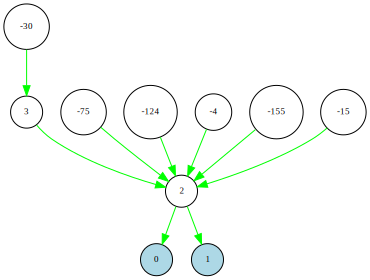

In [51]:
plot_genome_network(report.best_individual)

In [47]:
report.best_individual.to_dict()

{'key': 81,
 'id': '9aaff35c-1d43-4438-93c5-80e00add3acb',
 'n_input': 256,
 'n_output': 2,
 'output_nodes_keys': [0, 1],
 'input_nodes_keys': [-1,
  -2,
  -3,
  -4,
  -5,
  -6,
  -7,
  -8,
  -9,
  -10,
  -11,
  -12,
  -13,
  -14,
  -15,
  -16,
  -17,
  -18,
  -19,
  -20,
  -21,
  -22,
  -23,
  -24,
  -25,
  -26,
  -27,
  -28,
  -29,
  -30,
  -31,
  -32,
  -33,
  -34,
  -35,
  -36,
  -37,
  -38,
  -39,
  -40,
  -41,
  -42,
  -43,
  -44,
  -45,
  -46,
  -47,
  -48,
  -49,
  -50,
  -51,
  -52,
  -53,
  -54,
  -55,
  -56,
  -57,
  -58,
  -59,
  -60,
  -61,
  -62,
  -63,
  -64,
  -65,
  -66,
  -67,
  -68,
  -69,
  -70,
  -71,
  -72,
  -73,
  -74,
  -75,
  -76,
  -77,
  -78,
  -79,
  -80,
  -81,
  -82,
  -83,
  -84,
  -85,
  -86,
  -87,
  -88,
  -89,
  -90,
  -91,
  -92,
  -93,
  -94,
  -95,
  -96,
  -97,
  -98,
  -99,
  -100,
  -101,
  -102,
  -103,
  -104,
  -105,
  -106,
  -107,
  -108,
  -109,
  -110,
  -111,
  -112,
  -113,
  -114,
  -115,
  -116,
  -117,
  -118,
  -119,
  -120,
  -121

### Check evaluation results

In [31]:
from neat.evaluation.evaluate_simple import evaluate_genome
from neat.evaluation.utils import get_dataset
from neat.loss.vi_loss import get_loss, get_beta

In [29]:
testing = False

In [33]:
dataset = get_dataset(config.dataset, testing=testing)
loss = get_loss(problem_type=config.problem_type)

GETTING DATASET
